# Analysis

In [38]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler


sns.set(rc={'figure.figsize':(12,8)})

In [39]:
class CustomeOneHotEncoder:
    def __init__(self,drop=False):
        self.columns_ = None
        self.drop_ = drop
        self.encoder = OneHotEncoder()
        
    def fit(self,data,columns):
        self.columns_ = columns
        self.encoder.fit(data[self.columns_])
    
    def fit_transform(self,data,columns):
        self.fit(data,columns)
        return self.transform(data)
    
    def transform(self,data):
        feature_array = self.encoder.transform(data[self.columns_]).toarray()
        feature_label = self.encoder.categories_
        new_feature_label = []
        for x,y in zip(self.columns_,feature_label):
            new_feature_label.append([x+'_'+str(z) for z in y])

        final_feature_label= np.concatenate([x for x in new_feature_label])
        encoded_df = pd.DataFrame(feature_array,columns=final_feature_label,index = data.index)

        if self.drop_:
            cols_to_drop = [x[0] for x in new_feature_label]
            encoded_df = encoded_df.drop(cols_to_drop,axis=1)
        data = data.drop(self.columns_,axis=1)   
        #return encoded_df
        return pd.concat([data,encoded_df],axis=1)
    


# Linear Regression

In [40]:
pd.options.display.max_rows=None

In [41]:
data = pd.read_csv('train_1.csv')

data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Total_Members,Title,Cabin_Codes,Age_Group,Multiply,fare_per_person
0,1,0,3,male,22.0,1,0,7.2500,S,1,Mr,No_Cabin,3,66.0,3.62500
1,2,1,1,female,38.0,1,0,71.2833,C,1,Mr,C,3,38.0,35.64165
2,3,1,3,female,26.0,0,0,7.9250,S,0,Miss,No_Cabin,3,78.0,7.92500
3,4,1,1,female,35.0,1,0,53.1000,S,1,Mr,C,3,35.0,26.55000
4,5,0,3,male,35.0,0,0,8.0500,S,0,Mr,No_Cabin,3,105.0,8.05000


In [42]:
data = data.sample(frac=1)

**For Getting equal no of classes**

In [43]:

"""
temp = data[(data['Survived'] == 0) ].iloc[:342,:]
temp2 = data[(data['Survived'] == 1) ]data.head()
data = pd.concat([temp,temp2]).sort_values(by='PassengerId')
data.head()
"""

"\ntemp = data[(data['Survived'] == 0) ].iloc[:342,:]\ntemp2 = data[(data['Survived'] == 1) ]data.head()\ndata = pd.concat([temp,temp2]).sort_values(by='PassengerId')\ndata.head()\n"

In [73]:

dataset = data.copy()


## Train And test Dataset

In [157]:
y = dataset['Survived']
print('All Columns : {}'.format(dataset.columns.values))
cols_to_drop = ['Survived','PassengerId']
#cols_to_drop = ['Survived','PassengerId','SibSp',  'Total_Members','Age','Age_Group']
cols_to_inc = list(set(dataset.columns) - set(cols_to_drop))
print(' Dropped Columns : {}'.format(cols_to_drop))

x = dataset.drop(cols_to_drop,axis=1)

cat_columns = ['Age_Group','Cabin_Codes','Sex','Pclass','Title','Embarked']
#cat_columns = ['Cabin_Codes','Sex','Pclass','Title','Embarked']
num_columns = list(set(x.columns)- set(cat_columns))
print('Cateogrical Columns : {} \n Numerical Columns : {}'.format(cat_columns,num_columns))
x.head()

All Columns : ['PassengerId' 'Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare'
 'Embarked' 'Total_Members' 'Title' 'Cabin_Codes' 'Age_Group' 'Multiply'
 'fare_per_person']
 Dropped Columns : ['Survived', 'PassengerId']
Cateogrical Columns : ['Age_Group', 'Cabin_Codes', 'Sex', 'Pclass', 'Title', 'Embarked'] 
 Numerical Columns : ['SibSp', 'Parch', 'Total_Members', 'Multiply', 'Fare', 'fare_per_person', 'Age']


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Total_Members,Title,Cabin_Codes,Age_Group,Multiply,fare_per_person
24,3,female,8.0,3,1,21.0750,S,4,Miss,No_Cabin,2,24.0,4.215000
537,1,female,30.0,0,0,106.4250,C,0,Miss,No_Cabin,3,30.0,106.425000
30,1,male,40.0,0,0,27.7208,C,0,Don,No_Cabin,4,40.0,27.720800
756,3,male,28.0,0,0,7.7958,S,0,Mr,No_Cabin,3,84.0,7.795800
13,3,male,39.0,1,5,31.2750,S,6,Mr,No_Cabin,3,117.0,4.467857


In [158]:
encoder = CustomeOneHotEncoder(drop=True)
x = encoder.fit_transform(x,columns=cat_columns)
x.head()

,Age,SibSp,Parch,Fare,Total_Members,Multiply,fare_per_person,Age_Group_2,Age_Group_3,Age_Group_4,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev,Embarked_Q,Embarked_S
24,8.0,3,1,21.0750,4,24.0,4.215000,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
537,30.0,0,0,106.4250,0,30.0,106.425000,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,40.0,0,0,27.7208,0,40.0,27.720800,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
756,28.0,0,0,7.7958,0,84.0,7.795800,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
13,39.0,1,5,31.2750,6,117.0,4.467857,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [159]:
scaler = StandardScaler()
x[num_columns] = scaler.fit_transform(x[num_columns])
x.head()

,Age,SibSp,Parch,Fare,Total_Members,Multiply,fare_per_person,Age_Group_2,Age_Group_3,Age_Group_4,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev,Embarked_Q,Embarked_S
24,-1.578839,2.247470,0.767630,-0.224083,1.919564,-1.228230,-0.438327,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
537,0.072784,-0.474545,-0.473674,1.494412,-0.560975,-1.036165,2.415016,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.823522,-0.474545,-0.473674,-0.090272,-0.560975,-0.716055,0.217872,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
756,-0.077363,-0.474545,-0.473674,-0.491456,-0.560975,0.692427,-0.338364,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
13,0.748449,0.432793,5.732844,-0.018709,3.159833,1.748788,-0.431268,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [160]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [311]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,shuffle=True)

x_train.shape,x_test.shape


print('Test Shape : {} , Train Shape {}'.format(x_test.shape,x_train.shape))

Test Shape : (179, 38) , Train Shape (712, 38)


# Modelling

In [312]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics

**Sklearn Logisitc Regression**

In [313]:

model = LogisticRegression(C=657.8947124752119,max_iter=1000)
model = model.fit(x_train,y_train)
#print('Train Accuracy:', accuracy_score(y_train,res.predict(x_train)))
#print('Test Accuracy:', accuracy_score(y_test,res.predict(x_test)))

#print('Train Accuracy:' ,metrics.accuracy_score(y_train, res.predict(x_train)))
#print('Test Accuracy:' ,metrics.accuracy_score(y_test, res.predict(x_test)))


In [314]:
def get_accuracy(data_x,data_y,model):
    l = []
    for fo in model.predict(data_x).round(2):
        if fo >0.5:
            l.append(1)
        else:
            l.append(0)
    return accuracy_score(data_y,l)


In [315]:
print('Train Accuracy:', get_accuracy(x_train,y_train,model))
print('Test Accuracy:', get_accuracy(x_test,y_test,model))

Train Accuracy: 0.8258426966292135
Test Accuracy: 0.8491620111731844


**KFold Validation**

In [316]:
from sklearn.model_selection import KFold,cross_validate

In [317]:
cv = KFold(7,True,1)

C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [318]:
#model = LogisticRegression()

In [319]:
for train,test in cv.split(x):
    model.fit(x.iloc[train],y.iloc[train])
    print('Train acc :',model.score(x.iloc[train],y.iloc[train]))
    print('Test acc :',model.score(x.iloc[test],y.iloc[test]))

Train acc : 0.8322411533420708
Test acc : 0.859375
Train acc : 0.8414154652686763
Test acc : 0.8046875
Train acc : 0.8416230366492147
Test acc : 0.8031496062992126
Train acc : 0.8390052356020943
Test acc : 0.8267716535433071
Train acc : 0.8520942408376964
Test acc : 0.7637795275590551
Train acc : 0.8363874345549738
Test acc : 0.8188976377952756
Train acc : 0.831151832460733
Test acc : 0.8503937007874016


### Cross Validation

In [320]:
cv_score = cross_validate(model,x,y,cv=7,scoring='accuracy')['test_score']

In [321]:
print("CV Score : Mean : %.7g | Std : %.7g | Min : %.7g | Max : %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

CV Score : Mean : 0.8216307 | Std : 0.02716442 | Min : 0.7734375 | Max : 0.8582677


In [260]:
print("CV Score : Mean : %.7g | Std : %.7g | Min : %.7g | Max : %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

CV Score : Mean : 0.8283271 | Std : 0.01706482 | Min : 0.8046875 | Max : 0.8582677


### Grid Search, Randomized Search

In [285]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [286]:
parameters = {'C':[0.001,0.01,0.1,0.5,1,5,10,100],
             'max_iter':[100,150,200,500,1000]}


In [287]:
cv_model = GridSearchCV(model,parameters,verbose=1,cv=7,scoring='accuracy')
cv_model.fit(x,y)


Fitting 7 folds for each of 40 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the

GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100],
                         'max_iter': [100, 150, 200, 500, 1000]},
             scoring='accuracy', verbose=1)

In [288]:
cv_model.best_params_,cv_model.best_score_

({'C': 1, 'max_iter': 100}, 0.8283271231721036)

### Randomized Search

In [289]:
from sklearn.model_selection import RandomizedSearchCV

In [290]:
from scipy.stats import uniform
C = uniform(0,1000)
parameters = {'C':C,'max_iter': [100, 150, 200, 500, 1000]}


In [291]:
cv_model = RandomizedSearchCV(model,parameters,cv=7,scoring='accuracy')
cv_model.fit(x,y)


C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

RandomizedSearchCV(cv=7, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CC527794C8>,
                                        'max_iter': [100, 150, 200, 500, 1000]},
                   scoring='accuracy')

In [292]:
cv_model.best_params_,cv_model.best_score_

({'C': 657.8947124752119, 'max_iter': 1000}, 0.821630694600675)

## Create Submission

In [325]:
test_data = pd.read_csv('test_1.csv')
test_data = test_data.sample(frac=1)
passenger_id = test_data.PassengerId
test_data = test_data.drop(cols_to_drop[1:],axis=1)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Codes,Age_Group,Title,Total_Members,Multiply,fare_per_person
323,1,male,33.0,0,0,26.5500,S,No_Cabin,3,Mr,0,33.0,26.5500
269,3,male,17.0,0,0,8.6625,S,No_Cabin,2,Mr,0,51.0,8.6625
42,3,male,41.0,0,0,7.8500,S,No_Cabin,4,Mr,0,123.0,7.8500
298,1,male,30.0,0,0,45.5000,S,No_Cabin,3,Mr,0,30.0,45.5000
265,3,male,24.0,0,0,7.8958,S,No_Cabin,3,Mr,0,72.0,7.8958


In [326]:
test_data = encoder.transform(test_data)
test_data.head()

,Age,SibSp,Parch,Fare,Total_Members,Multiply,fare_per_person,Age_Group_2,Age_Group_3,Age_Group_4,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev,Embarked_Q,Embarked_S
323,33.0,0,0,26.5500,0,33.0,26.5500,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
269,17.0,0,0,8.6625,0,51.0,8.6625,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
42,41.0,0,0,7.8500,0,123.0,7.8500,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
298,30.0,0,0,45.5000,0,30.0,45.5000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
265,24.0,0,0,7.8958,0,72.0,7.8958,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [327]:
test_data[num_columns] = scaler.fit_transform(test_data[num_columns])
#test_data = test_data.iloc[:,1:]
test_data.head()

,Age,SibSp,Parch,Fare,Total_Members,Multiply,fare_per_person,Age_Group_2,Age_Group_3,Age_Group_4,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev,Embarked_Q,Embarked_S
323,0.288001,-0.49947,-0.400248,-0.161513,-0.553443,-1.041979,0.134392,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
269,-0.945524,-0.49947,-0.400248,-0.482135,-0.553443,-0.360435,-0.368618,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
42,0.904763,-0.49947,-0.400248,-0.496698,-0.553443,2.365739,-0.391466,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
298,0.056715,-0.49947,-0.400248,0.178153,-0.553443,-1.155570,0.667281,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
265,-0.405857,-0.49947,-0.400248,-0.495877,-0.553443,0.434699,-0.390178,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [64]:
'''#res = DecisionTreeClassifier(max_depth=4,criterion="entropy").fit(x,y)
dataset = dataset.sample(frac=1)


y = dataset['Survived']
cols_to_drop = ['Survived','PassengerId','Parch', 'Fare','Age_Group', 'SibSp','Multiply','Cabin_Codes']
x = dataset.drop(cols_to_drop,axis=1)
encoder = CustomeOneHotEncoder(drop=True)
x = encoder.fit_transform(x,columns=['Pclass','Sex','Embarked','Title'])
scaler = StandardScaler()
x[['Total_Members','Age']] = scaler.fit_transform(x[['Total_Members','Age']])
x.head()

#res = sm.OLS(y,sm.add_constant(x))
#res = res.fit()

res = LinearRegression(fit_intercept=False)
res = res.fit(x,y,)

#print('Train Accuracy:', accuracy_score(y_train,res.predict(x_train)))
#print('Test Accuracy:', accuracy_score(y_test,res.predict(x_test)))
print('Train Accuracy:' ,get_accuracy(x,y,res))
#pred_values = res.predict(test_data)
l = []
for x in res.predict(test_data).round(2):
    if x >0.5:
        l.append(1)
    else:
        l.append(0)

'''

Train Accuracy: 0.8201754385964912


In [330]:
result = pd.DataFrame({
                        'PassengerId': passenger_id,
                        'Survived': model.predict(test_data)
                        })
result = result.sort_values(by='PassengerId')

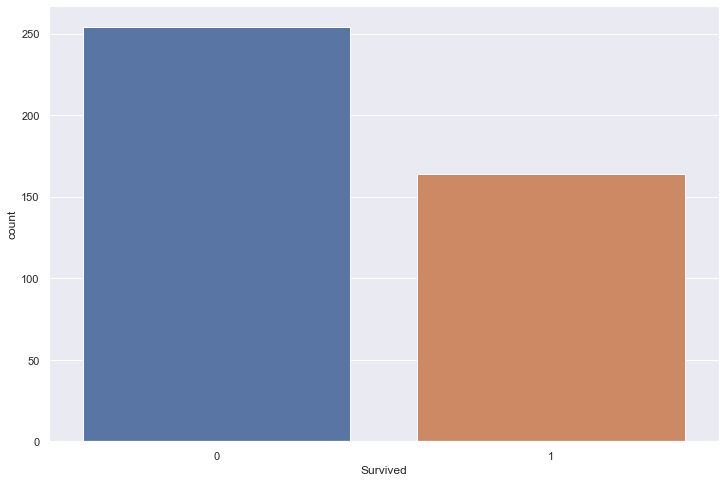

In [331]:
sns.countplot(result['Survived'])

In [332]:
result.shape

(418, 2)

In [333]:
result.to_csv('Prediction_19.csv',index=False)